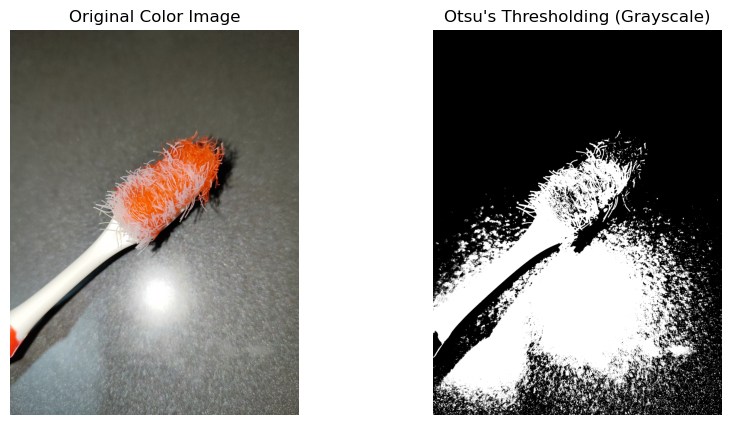

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load the image in color (BGR format)
img = cv2.imread(r'E:\School works\College\4th Yr\PROF ELEC 5\Assignment Image Processing\Used_Toothbrush.jpg')

# Convert the BGR image to grayscale for Otsu's thresholding
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding
ret, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original (color) and thresholded (grayscale) images using matplotlib
plt.figure(figsize=(10, 5))

# Original color image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.title('Original Color Image')
plt.axis('off')

# Otsu Thresholding result
plt.subplot(1, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title("Otsu's Thresholding (Grayscale)")
plt.axis('off')

# Show the images
plt.show()


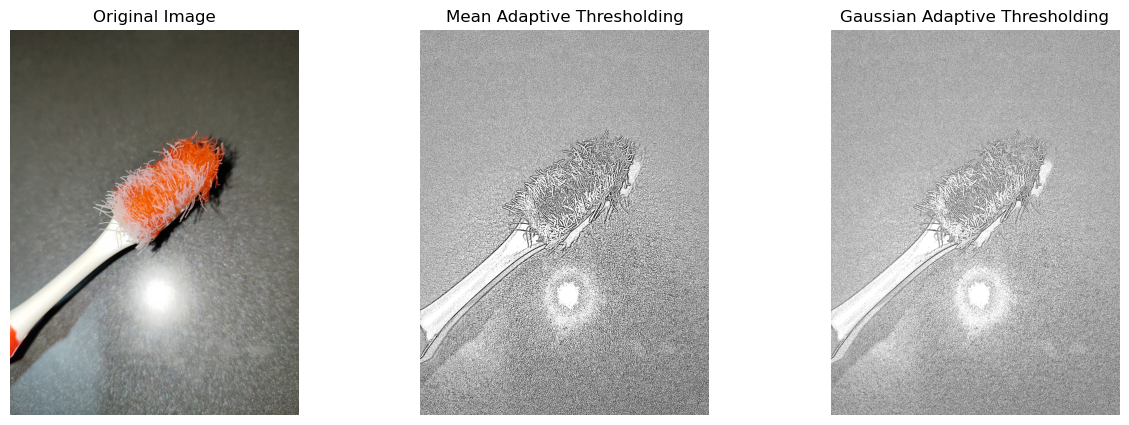

In [4]:
##Adaptive Thresholding

import cv2
import matplotlib.pyplot as plt

# Load the image in color
img = cv2.imread(r'E:\School works\College\4th Yr\PROF ELEC 5\Assignment Image Processing\Used_Toothbrush.jpg')

# Convert to grayscale for adaptive thresholding
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply mean adaptive thresholding
thresh1 = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply Gaussian adaptive thresholding
thresh2 = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the original and thresholded images using matplotlib
plt.figure(figsize=(15, 5))

# Original image (color)
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.title('Original Image')
plt.axis('off')

# Mean Adaptive Thresholding result
plt.subplot(1, 3, 2)
plt.imshow(thresh1, cmap='gray')
plt.title('Mean Adaptive Thresholding')
plt.axis('off')

# Gaussian Adaptive Thresholding result
plt.subplot(1, 3, 3)
plt.imshow(thresh2, cmap='gray')
plt.title('Gaussian Adaptive Thresholding')
plt.axis('off')

# Show the images
plt.show()

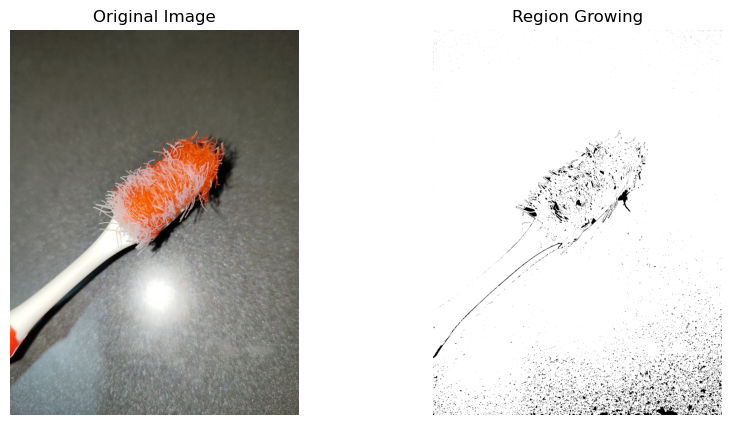

In [6]:
##Region Growing

import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_growing(image, seed_point, threshold):
    """
    Performs region growing on an image.
    
    Args:
        image: The input image (grayscale).
        seed_point: The coordinates of the seed point.
        threshold: The similarity threshold.
    
    Returns:
        A binary mask representing the segmented region.
    """
    rows, cols = image.shape
    mask = np.zeros_like(image)
    queue = [seed_point]
    
    while queue:
        x, y = queue.pop(0)
        if mask[x, y] == 0:
            mask[x, y] = 1
            neighbors = [(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)]
            for nx, ny in neighbors:
                if 0 <= nx < rows and 0 <= ny < cols and abs(int(image[x, y]) - int(image[nx, ny])) <= threshold:
                    queue.append((nx, ny))
    
    return mask

# Example usage
image = cv2.imread(r'E:\School works\College\4th Yr\PROF ELEC 5\Assignment Image Processing\Used_Toothbrush Low.jpg')  # Load in color
seed_point = (100, 100)  # Set the seed point
threshold = 10  # Set the similarity threshold

# Convert the image to grayscale for region growing
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
mask = region_growing(gray_image, seed_point, threshold)

# Display the original color image and region growing result using matplotlib
plt.figure(figsize=(10, 5))

# Original image (in color)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.title('Original Image')
plt.axis('off')

# Region Growing result
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Region Growing')
plt.axis('off')

# Show the images
plt.show()

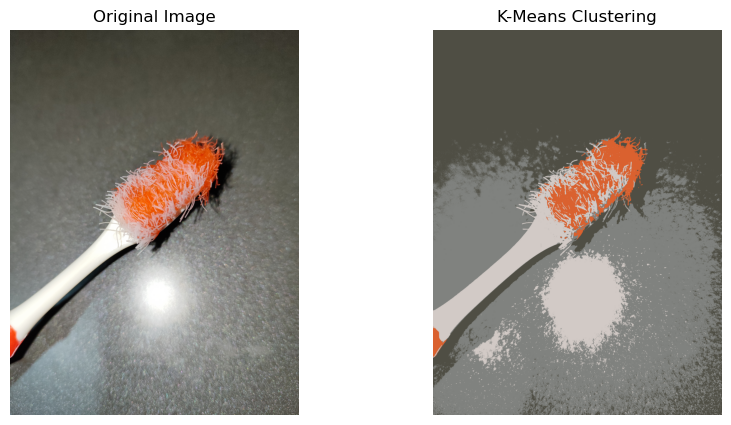

In [4]:
##K-Means Clustering

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the image in color (BGR format)
image = cv2.imread(r'E:\School works\College\4th Yr\PROF ELEC 5\Assignment Image Processing\Used_Toothbrush.jpg')

# Reshape the image to a 2D array of pixels (3 channels)
img_reshaped = image.reshape((-1, 3))

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(img_reshaped)

# Get the labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_.astype(int)

# Reshape the labels back to the original image shape
labels = labels.reshape(image.shape[:2])

# Create the segmented image using the cluster centers
segmented_image = np.zeros_like(image)
for i in range(len(centers)):
    segmented_image[labels == i] = centers[i]

# Display the original and segmented images using matplotlib
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.title('Original Image')
plt.axis('off')

# Segmented image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.title('K-Means Clustering')
plt.axis('off')

# Show the images
plt.show()


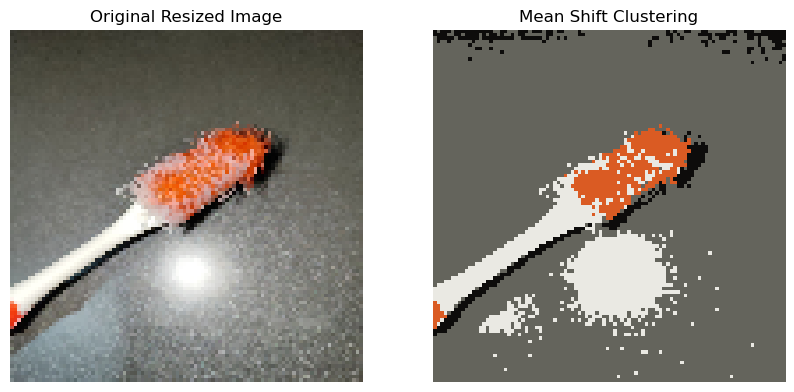

In [2]:
##Mean Shift Clustering

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift

# Load the image
img = cv2.imread(r'E:\School works\College\4th Yr\PROF ELEC 5\Assignment Image Processing\Used_Toothbrush.jpg')

# Resize the image to a smaller size (for example, to 100x100)
img_resized = cv2.resize(img, (100, 100))

# Reshape the resized image to a 2D array (each pixel is a point)
img_reshaped = img_resized.reshape((-1, 3))

# Perform mean shift clustering
ms = MeanShift()
ms.fit(img_reshaped)
labels = ms.labels_
centers = ms.cluster_centers_

# Reshape the labels back to the 2D image shape
labels = labels.reshape(img_resized.shape[:2])

# Create the segmented image by assigning the cluster centers to each pixel
segmented_image = np.zeros_like(img_resized)
for i in range(len(centers)):
    segmented_image[labels == i] = centers[i]

# Display the original (resized) and segmented images using matplotlib
plt.figure(figsize=(10, 5))

# Resized original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.title('Original Resized Image')
plt.axis('off')

# Mean Shift Clustering result
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.title("Mean Shift Clustering")
plt.axis('off')

# Show the images
plt.show()